In [2]:
import pygmt
import matplotlib.pyplot as plt
import pandas as pd

# plotting the region of interest

In [3]:
#help(pygmt.Figure())
lats = [22.26,20.01,17.53,15.17,12.5,9.05,6.96]
lons = [67.47,69.24,71.12,72.74,74.04,75.44,77.39]
names = ["Okha","Mumbai","Jaigarh","Goa","Udupi","Kollam","Kanyakumari"]


text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [point]
text [WARNING]: 12p/re not a valid number and may not be decoded properly.
text [WARNING]: Length <unit> d not supported - revert to default unit [poin

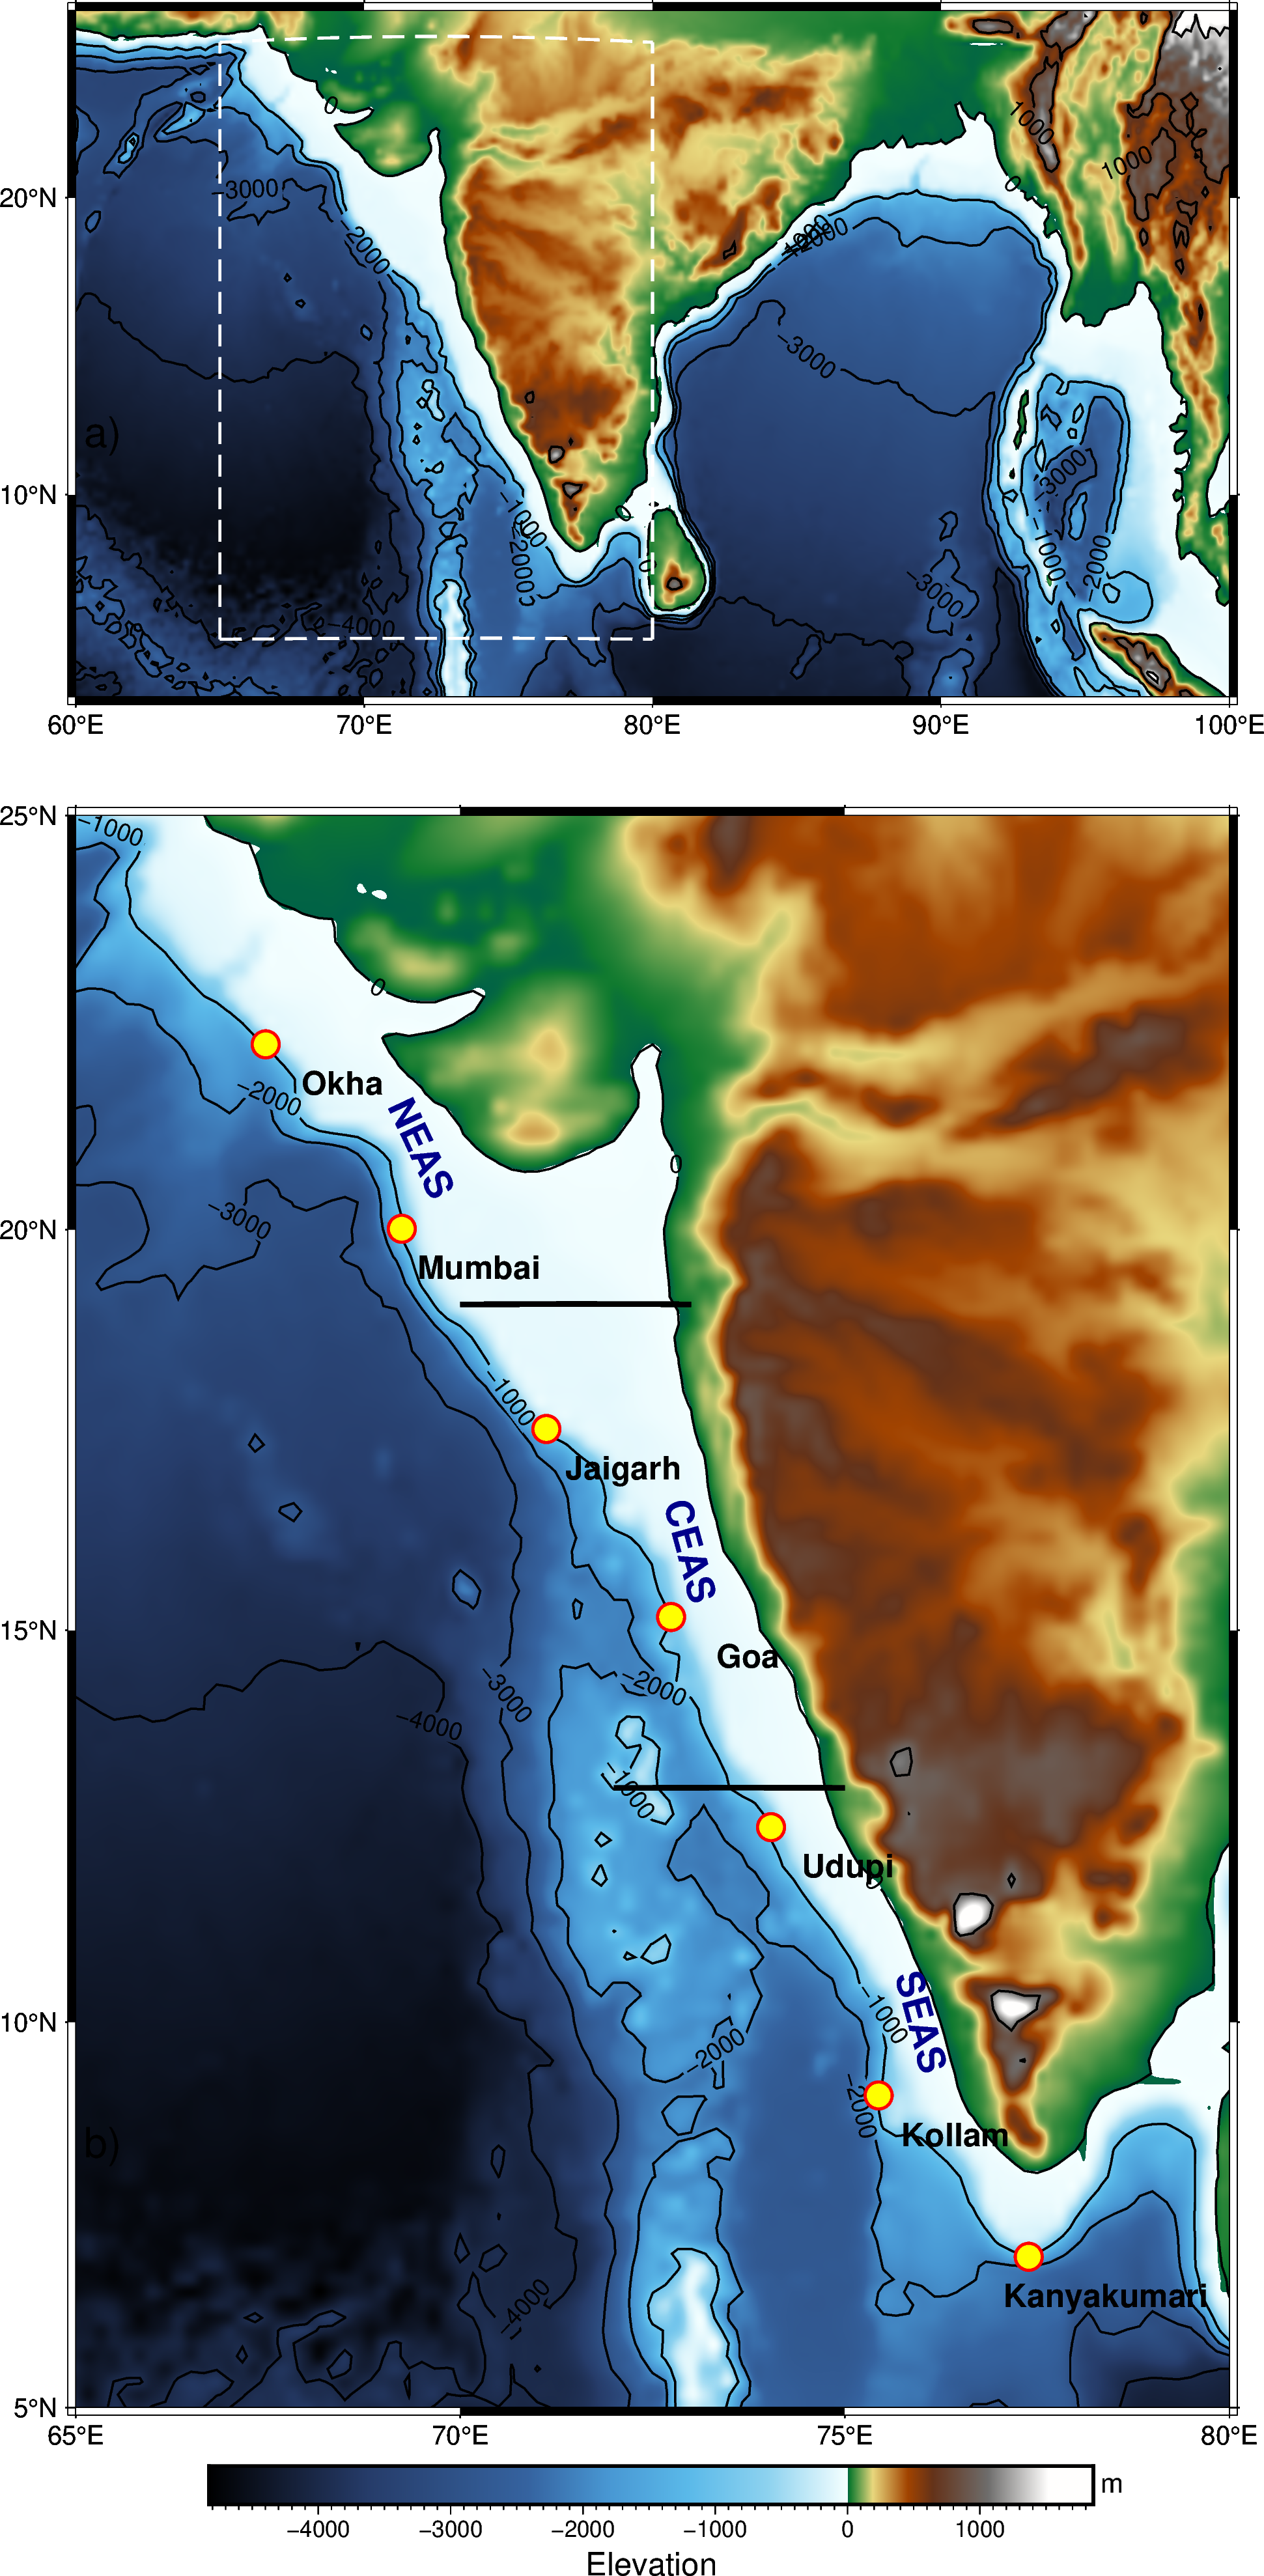

In [12]:
fig = pygmt.Figure()
#subset_region1 = [79,79.7,8.9,9.5]
#grid_subset1 =  pygmt.datasets.load_earth_relief(resolution="03s",region=subset_region1)

#levels = [-6000, -4000, -2000, 0, 1000, 2000, 3000]
with fig.subplot(nrows=2,ncols=1, autolabel=True, margins="9c",figsize=[8,26]):
    with fig.set_panel(panel=0):
        grid1 = pygmt.datasets.load_earth_relief(resolution="10m", region=[60,100,3,26])
        pygmt.makecpt(series=[-8000,8000])
        fig.grdimage(grid=grid1, projection="M15c", frame="a", cmap="geo",dpi=300)
        fig.grdcontour(grid=grid1,projection="M15c", interval=1000, annotation="1000",frame="a")
        fig.plot(x=[65,80],projection="M15c" , y=[5,5], pen='1p,white,dashed')
        fig.plot(x=[65,80],projection="M15c" , y=[25,25], pen='1p,white,dashed')
        fig.plot(x=[65,65],projection="M15c" , y=[5,25], pen='1p,white,dashed')
        fig.plot(x=[80,80],projection="M15c" , y=[5,25], pen='1p,white,dashed')
    with fig.set_panel(panel=1):
        grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[65,80,5,25])
        pygmt.makecpt(series=[-8000,8000])

        fig.grdimage(grid=grid, region=None,projection="M15c", frame="a", cmap="geo",dpi=300)
        fig.grdcontour(grid=grid,projection="M15c", interval=1000, annotation="1000",frame="a")
        fig.colorbar(frame=["a1000f100", "x+lElevation", "y+lm"],    position="g60/-2+w11.5c/0.5c+h",)

        for i in range(len(lats)):
            fig.plot(
            x=lons[i],
            y=lats[i],projection="M15c",style='c10p', fill='yellow', pen='1p,red'
  # Label for the legend
        )
            fig.text(
            x=lons[i],
            y=lats[i],
            text=names[i],projection="M15c",
            angle=0,offset="1c/-0.5c",
            font="12p,Helvetica-Bold"
        )
            ########33adding lines, 
        fig.plot(
            x=[70,73],
            y=[19.076,19.076],projection="M15c",
            pen='2p,black'
        )
        fig.plot(
            x=[72,75],
            y=[13,13],projection="M15c",
            pen='2p,black'
        )
###########3adding text
 
            
        fig.text(
            x=69.5,
            y=21,
            text="NEAS",projection="M15c",
            angle=-65,
            font="14p,Helvetica-Bold,darkblue"
        )
        
        fig.text(
            x=73,
            y=16,
            text="CEAS",projection="M15c",
            angle=-75,
            font="14p,Helvetica-Bold,darkblue"
        )
        
        fig.text(
            x=76,
            y=10,
            text="SEAS",projection="M15c",
            angle=-75,
            font="14p,Helvetica-Bold,darkblue"
        )
fig.show()
fig.savefig("/home/scilab/Documents/backscatter_wc/figures/adcp_moorings_new.jpg", dpi=300)

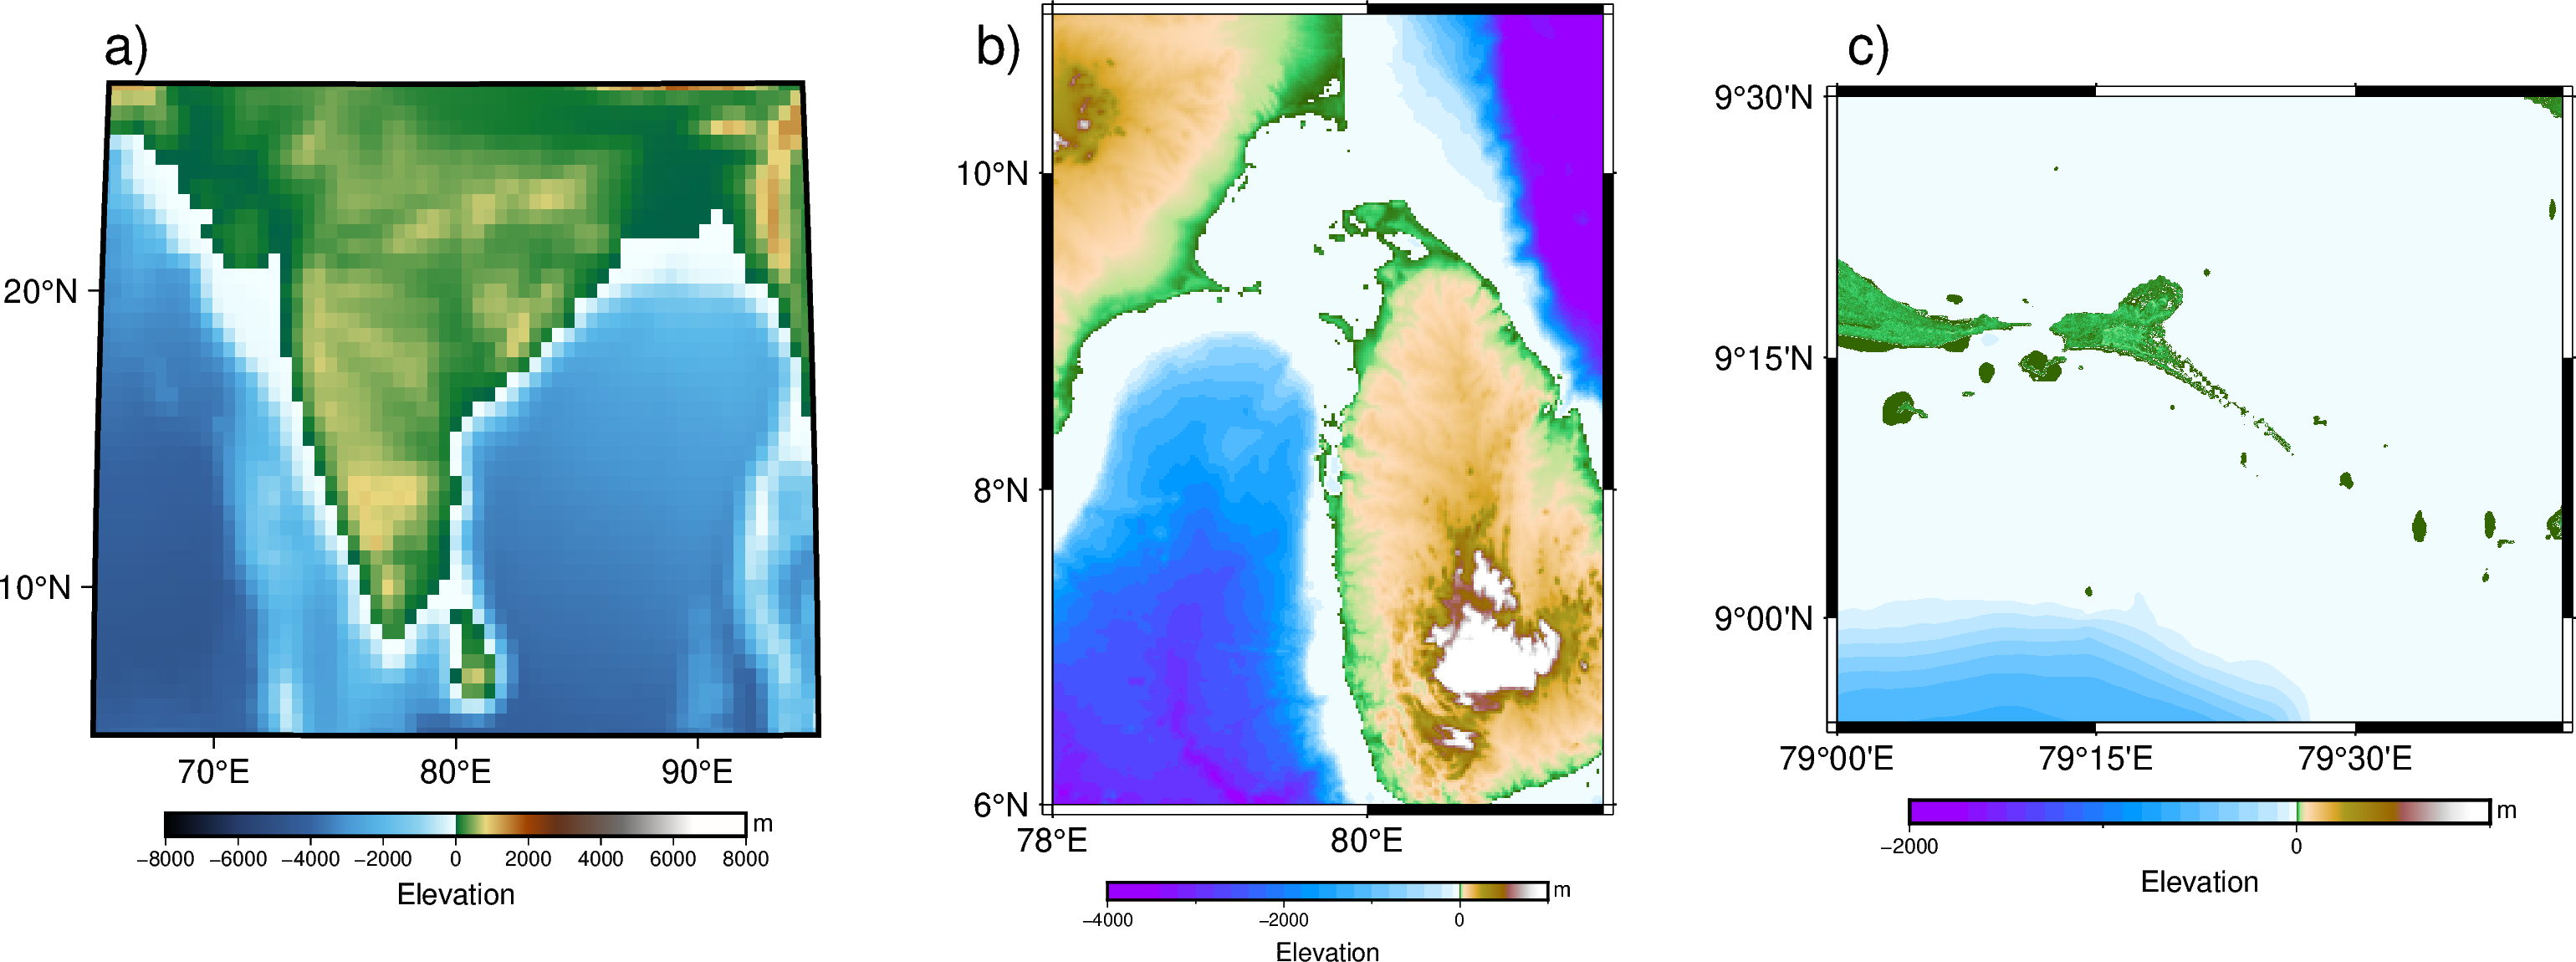

In [70]:
fig = pygmt.Figure()

grid_globe = pygmt.datasets.load_earth_relief(resolution="30m")
subset_region = [78,81.5,6,11]
grid_subset= pygmt.datasets.load_earth_relief(resolution="01m",region=subset_region)

subset_region1 = [79,79.7,8.9,9.5]
grid_subset1 =  pygmt.datasets.load_earth_relief(resolution="01s",region=subset_region1)


with fig.subplot(nrows=1,ncols=3, figsize=("25c","8c"), autolabel=True, margins="0.5c"):
    with fig.set_panel(panel=0):
        pygmt.makecpt(cmap="geo",series=[-8000,8000])
        fig.grdimage(grid=grid_globe,projection="R",region=[65,95,5,27],frame="a")
        fig.colorbar(frame=["a2000f4000", "x+lElevation", "y+lm"])
    with fig.set_panel(panel=1):
        pygmt.makecpt(cmap="globe",series=[-4000,1000])
        fig.grdimage(grid=grid_subset,projection="M",region=subset_region,frame="a")
        fig.colorbar(frame=["a2000f1000", "x+lElevation", "y+lm"])
    with fig.set_panel(panel=2):
        pygmt.makecpt(cmap="globe",series=[-2000,1000])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.colorbar(frame=["a2000f1000", "x+lElevation", "y+lm"])

fig.show()
#fig.savefig("/home/scilab/Desktop/test/pygmt/test_map.png",dpi=300)

In [68]:
m2_color = [("red" if df["m2_E"][i]>0 else "darkgreen") for i in range(len(df["m2_E"]))]
s2_color = [("red" if df["s2_E"][i]>0 else "darkgreen") for i in range(len(df["s2_E"]))]
k1_color = [("red" if df["k1_E"][i]>0 else "darkgreen") for i in range(len(df["k1_E"]))]

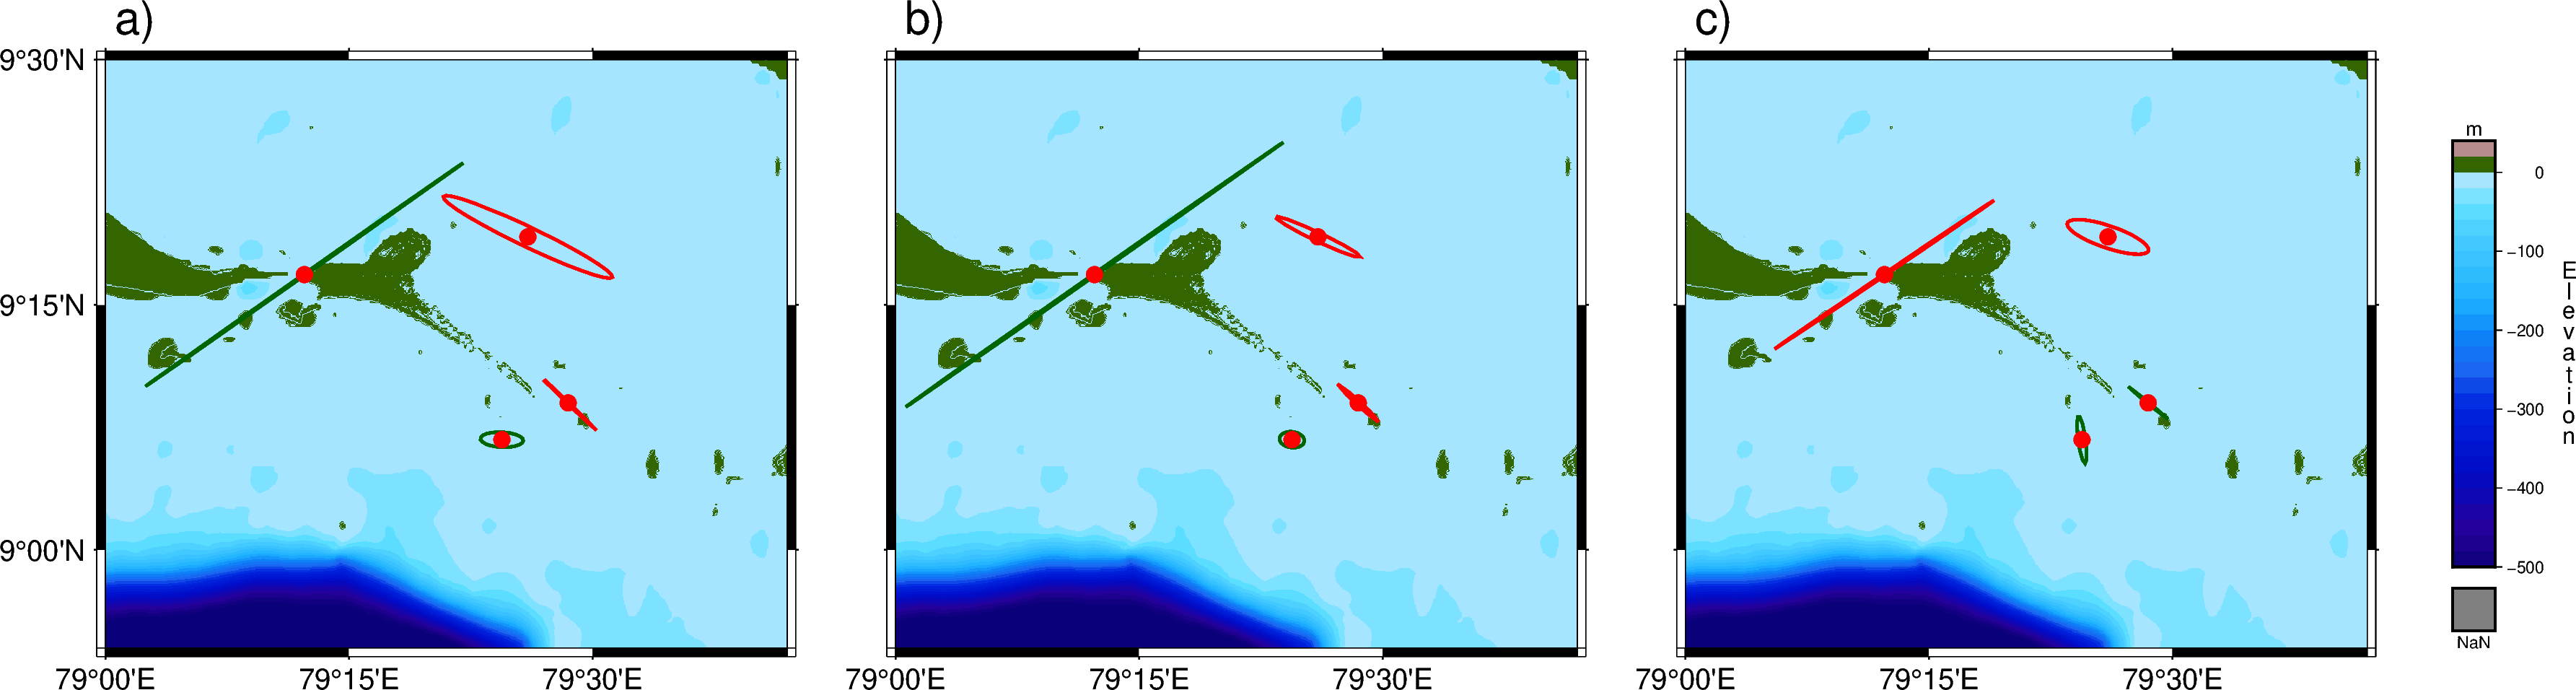

In [69]:
fig = pygmt.Figure()


subset_region1 = [79,79.7,8.9,9.5]
grid_subset1 =  pygmt.datasets.load_earth_relief(resolution="03s",region=subset_region1)

levels = [-6000, -4000, -2000, 0, 1000, 2000, 3000]
with fig.subplot(nrows=1,ncols=3, autolabel=True, margins="0.5c"
                ,sharey="l",subsize=(8,8.5)):
    with fig.set_panel(panel=0):
        pygmt.makecpt(cmap="etopo1",series=[-500,50,20])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.plot( x=df["lon"][5],y=df["lat"][5], style='E{}/{}/{}'.format(df["m2_theta"][5],df["m2_maj"][5]*3,df["m2_min"][5]*3),
                 pen='1p,{}'.format(m2_color[5]))
        fig.plot( x=df["lon"][4],y=df["lat"][4], style='E{}/{}/{}'.format(df["m2_theta"][4],df["m2_maj"][4]*3,df["m2_min"][4]*3),
                 pen='1p,{}'.format(m2_color[4]))
        fig.plot( x=df["lon"][3],y=df["lat"][3], style='E{}/{}/{}'.format(df["m2_theta"][3],df["m2_maj"][3]*3,df["m2_min"][3]*3),
                 pen='1p,{}'.format(m2_color[3]))
        fig.plot( x=df["lon"][2],y=df["lat"][2], style='E{}/{}/{}'.format(df["m2_theta"][2],df["m2_maj"][2]*3,df["m2_min"][2]*3),
                 pen='1p,{}'.format(m2_color[2]))
        fig.plot(x=df["lon"][5],y=df["lat"][5],style="p0.2",fill='red')
        fig.plot(x=df["lon"][4],y=df["lat"][4],style="p0.2",fill='red')
        fig.plot(x=df["lon"][3],y=df["lat"][3],style="p0.2",fill='red')
        fig.plot(x=df["lon"][2],y=df["lat"][2],style="p0.2",fill='red')

    with fig.set_panel(panel=1):
        pygmt.makecpt(cmap="etopo1",series=[-500,50,20])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.plot( x=df["lon"][5],y=df["lat"][5], style='E{}/{}/{}'.format(df["s2_theta"][5],df["s2_maj"][5]*3,df["s2_min"][5]*3),
                 pen='1p,{}'.format(s2_color[5]))
        fig.plot( x=df["lon"][4],y=df["lat"][4], style='E{}/{}/{}'.format(df["s2_theta"][4],df["s2_maj"][4]*3,df["s2_min"][4]*3),
                 pen='1p,{}'.format(s2_color[4]))
        fig.plot( x=df["lon"][3],y=df["lat"][3], style='E{}/{}/{}'.format(df["s2_theta"][3],df["s2_maj"][3]*3,df["s2_min"][3]*3),
                 pen='1p,{}'.format(s2_color[3]))
        fig.plot( x=df["lon"][2],y=df["lat"][2], style='E{}/{}/{}'.format(df["s2_theta"][2],df["s2_maj"][2]*3,df["s2_min"][2]*3),
                 pen='1p,{}'.format(s2_color[2]))
        fig.plot(x=df["lon"][5],y=df["lat"][5],style="p0.2",fill='red')
        fig.plot(x=df["lon"][4],y=df["lat"][4],style="p0.2",fill='red')
        fig.plot(x=df["lon"][3],y=df["lat"][3],style="p0.2",fill='red')
        fig.plot(x=df["lon"][2],y=df["lat"][2],style="p0.2",fill='red')
    with fig.set_panel(panel=2):
        pygmt.makecpt(cmap="etopo1",series=[-500,50,20])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.plot( x=df["lon"][5],y=df["lat"][5], style='E{}/{}/{}'.format(df["k1_theta"][5],df["k1_maj"][5]*3,df["k1_min"][5]*3),
                 pen='1p,{}'.format(k1_color[5]))
        fig.plot( x=df["lon"][4],y=df["lat"][4], style='E{}/{}/{}'.format(df["k1_theta"][4],df["k1_maj"][4]*3,df["k1_min"][4]*3),
                 pen='1p,{}'.format(k1_color[4]))
        fig.plot( x=df["lon"][3],y=df["lat"][3], style='E{}/{}/{}'.format(df["k1_theta"][3],df["k1_maj"][3]*3,df["k1_min"][3]*3),
                 pen='1p,{}'.format(k1_color[3]))
        fig.plot( x=df["lon"][2],y=df["lat"][2], style='E{}/{}/{}'.format(df["k1_theta"][2],df["k1_maj"][2]*3,df["k1_min"][2]*3),
                 pen='1p,{}'.format(k1_color[2]))
        fig.plot(x=df["lon"][5],y=df["lat"][5],style="p0.2",fill='red')
        fig.plot(x=df["lon"][4],y=df["lat"][4],style="p0.2",fill='red')
        fig.plot(x=df["lon"][3],y=df["lat"][3],style="p0.2",fill='red')
        fig.plot(x=df["lon"][2],y=df["lat"][2],style="p0.2",fill='red')
        fig.colorbar(frame=["a100f1000", "x+lElevation", "y+lm"],    position="JMR+o1c/0c+w5c/0.5c+n+mc",)

fig.show()
fig.savefig("/home/scilab/Desktop/test/pygmt/ellipse_on_map.png",dpi=300)

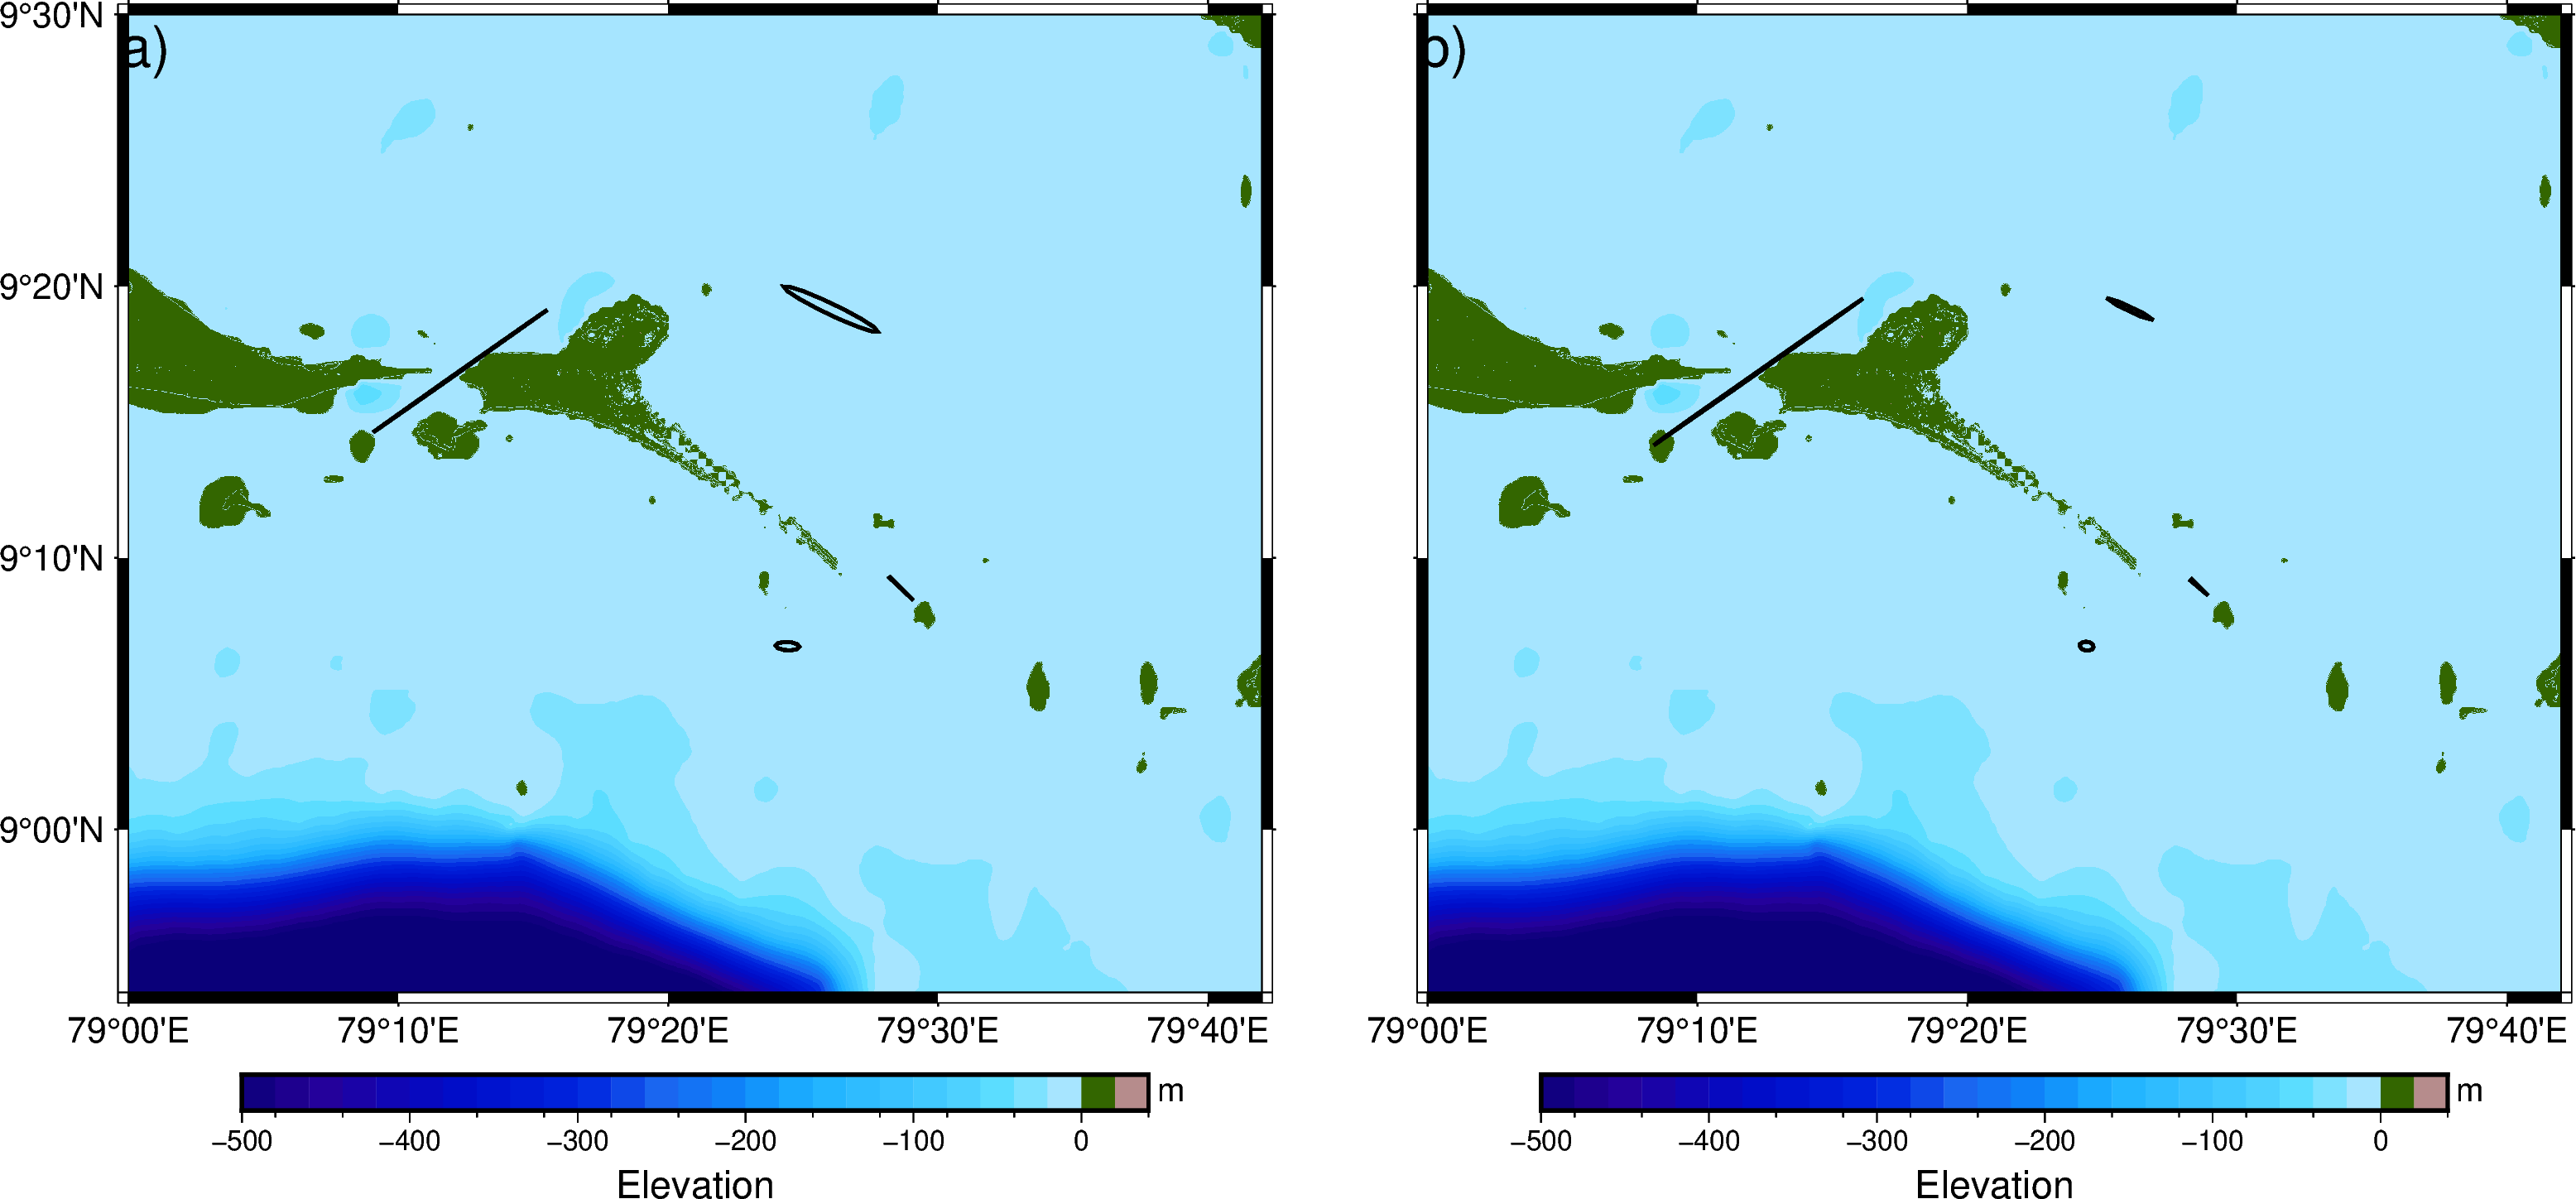

In [24]:
fig = pygmt.Figure()


subset_region1 = [79,79.7,8.9,9.5]
grid_subset1 =  pygmt.datasets.load_earth_relief(resolution="01s",region=subset_region1)

levels = [-6000, -4000, -2000, 0, 1000, 2000, 3000]
with fig.subplot(nrows=1,ncols=3, autolabel=True, margins="0.5c"
                ,sharey="l",subsize=(12,10)):
    with fig.set_panel(panel=0):
        pygmt.makecpt(cmap="etopo1",series=[-500,50,20])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.colorbar(frame=["a100f40", "x+lElevation", "y+lm"])
        fig.plot( x=df["lon"][5],y=df["lat"][5], style='E{}/{}/{}'.format(df["m2_theta"][5],df["m2_maj"][5],df["m2_min"][5]),
                 pen='1p,black')
        fig.plot( x=df["lon"][4],y=df["lat"][4], style='E{}/{}/{}'.format(df["m2_theta"][4],df["m2_maj"][4],df["m2_min"][4]),
                 pen='1p,black')
        fig.plot( x=df["lon"][3],y=df["lat"][3], style='E{}/{}/{}'.format(df["m2_theta"][3],df["m2_maj"][3],df["m2_min"][3]),
                 pen='1p,black')
        fig.plot( x=df["lon"][2],y=df["lat"][2], style='E{}/{}/{}'.format(df["m2_theta"][2],df["m2_maj"][2],df["m2_min"][2]),
                 pen='1p,black')
    with fig.set_panel(panel=1):
        pygmt.makecpt(cmap="etopo1",series=[-500,50,20])
        fig.grdimage(grid=grid_subset1,projection="M",region=subset_region1,frame="a")
        fig.colorbar(frame=["a100f40", "x+lElevation", "y+lm"])
        fig.plot( x=df["lon"][5],y=df["lat"][5], style='E{}/{}/{}'.format(df["s2_theta"][5],df["s2_maj"][5],df["s2_min"][5]),
                 pen='1p,black')
        fig.plot( x=df["lon"][4],y=df["lat"][4], style='E{}/{}/{}'.format(df["s2_theta"][4],df["s2_maj"][4],df["s2_min"][4]),
                 pen='1p,black')
        fig.plot( x=df["lon"][3],y=df["lat"][3], style='E{}/{}/{}'.format(df["s2_theta"][3],df["s2_maj"][3],df["s2_min"][3]),
                 pen='1p,black')
        fig.plot( x=df["lon"][2],y=df["lat"][2], style='E{}/{}/{}'.format(df["s2_theta"][2],df["s2_maj"][2],df["s2_min"][2]),
                 pen='1p,black')   
fig.show()